In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
import seaborn as sns
import os
import spacy
import string
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
data = pd.read_csv('train_cap2018.csv')

In [3]:
data.sample(5)

,fulltext,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,...,Maas lgV0,MATTR,MSTTR,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K,level1
24669,\r\r\n Sherry to contact Alison Bright : ...,2,40,179,56,6,20.000000,4.475000,1.400000,0.050000,...,7.67,NaN,NaN,149.33,5.85,0.95,0.92,75.80,37.50,A1
9988,"\r\r\n In my country, France, the nature ...",8,82,333,105,15,10.250000,4.060976,1.280488,0.097561,...,5.66,NaN,NaN,110.75,7.18,0.92,0.79,36.30,104.10,A2
23216,"\r\r\n Dear My freind, In my country , so...",7,67,253,78,15,9.571429,3.776119,1.164179,0.104478,...,4.31,NaN,NaN,55.18,5.86,0.86,0.72,23.02,120.29,A1
20498,\r\r\n Name : Elisabeth Corret Age : 50 H...,3,22,62,27,14,7.333333,2.818182,1.227273,0.136364,...,3.08,NaN,NaN,14.62,3.62,0.70,0.77,16.09,454.55,A1
3996,\r\r\n I just listened this song who is w...,8,94,370,123,13,11.750000,3.936170,1.308511,0.085106,...,3.69,NaN,NaN,42.96,5.67,0.82,0.59,16.73,203.71,B1


In [4]:
data['tokens_gensim'] = data.fulltext.apply(lambda x: gensim.utils.simple_preprocess(x))

In [6]:
punctuations = string.punctuation
nlp = spacy.load('en_core_web_lg')

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [7]:
import time
start = time.time()
fulltext_cleaned = cleanup_text(data.fulltext, logging=True)
end = time.time()
print("Processed all documents in {} mins".format((end-start)/60))

Processed 1000 out of 27310 documents.
Processed 2000 out of 27310 documents.
Processed 3000 out of 27310 documents.
Processed 4000 out of 27310 documents.
Processed 5000 out of 27310 documents.
Processed 6000 out of 27310 documents.
Processed 7000 out of 27310 documents.
Processed 8000 out of 27310 documents.
Processed 9000 out of 27310 documents.
Processed 10000 out of 27310 documents.
Processed 11000 out of 27310 documents.
Processed 12000 out of 27310 documents.
Processed 13000 out of 27310 documents.
Processed 14000 out of 27310 documents.
Processed 15000 out of 27310 documents.
Processed 16000 out of 27310 documents.
Processed 17000 out of 27310 documents.
Processed 18000 out of 27310 documents.
Processed 19000 out of 27310 documents.
Processed 20000 out of 27310 documents.
Processed 21000 out of 27310 documents.
Processed 22000 out of 27310 documents.
Processed 23000 out of 27310 documents.
Processed 24000 out of 27310 documents.
Processed 25000 out of 27310 documents.
Processed

In [8]:
data["spacy_text"] = fulltext_cleaned

c2_text = [txt for txt in data[data["level1"] == 'C2']["spacy_text"]]
c1_text = [txt for txt in data[data["level1"] == 'C1']["spacy_text"]]
b2_text = [txt for txt in data[data["level1"] == 'B2']["spacy_text"]]
b1_text = [txt for txt in data[data["level1"] == 'B1']["spacy_text"]]
a2_text = [txt for txt in data[data["level1"] == 'A2']["spacy_text"]]
a1_text = [txt for txt in data[data["level1"] == 'A1']["spacy_text"]]

In [9]:
from collections import Counter

#count all unique words
c2_count_words = Counter(' '.join(c2_text).split())
c1_count_words = Counter(' '.join(c1_text).split())
b2_count_words = Counter(' '.join(b2_text).split())
b1_count_words = Counter(' '.join(b1_text).split())
a2_count_words = Counter(' '.join(a2_text).split())
a1_count_words = Counter(' '.join(a1_text).split())

c2_common_words = [word[0] for word in c2_count_words.most_common(25)]
c2_common_count = [word[1] for word in c2_count_words.most_common(25)]

c1_common_words = [word[0] for word in c1_count_words.most_common(25)]
c1_common_count = [word[1] for word in c1_count_words.most_common(25)]

b2_common_words = [word[0] for word in b2_count_words.most_common(25)]
b2_common_count = [word[1] for word in b2_count_words.most_common(25)]

b1_common_words = [word[0] for word in b1_count_words.most_common(25)]
b1_common_count = [word[1] for word in b1_count_words.most_common(25)]

a2_common_words = [word[0] for word in a2_count_words.most_common(25)]
a2_common_count = [word[1] for word in a2_count_words.most_common(25)]

a1_common_words = [word[0] for word in a1_count_words.most_common(25)]
a1_common_count = [word[1] for word in a1_count_words.most_common(25)]

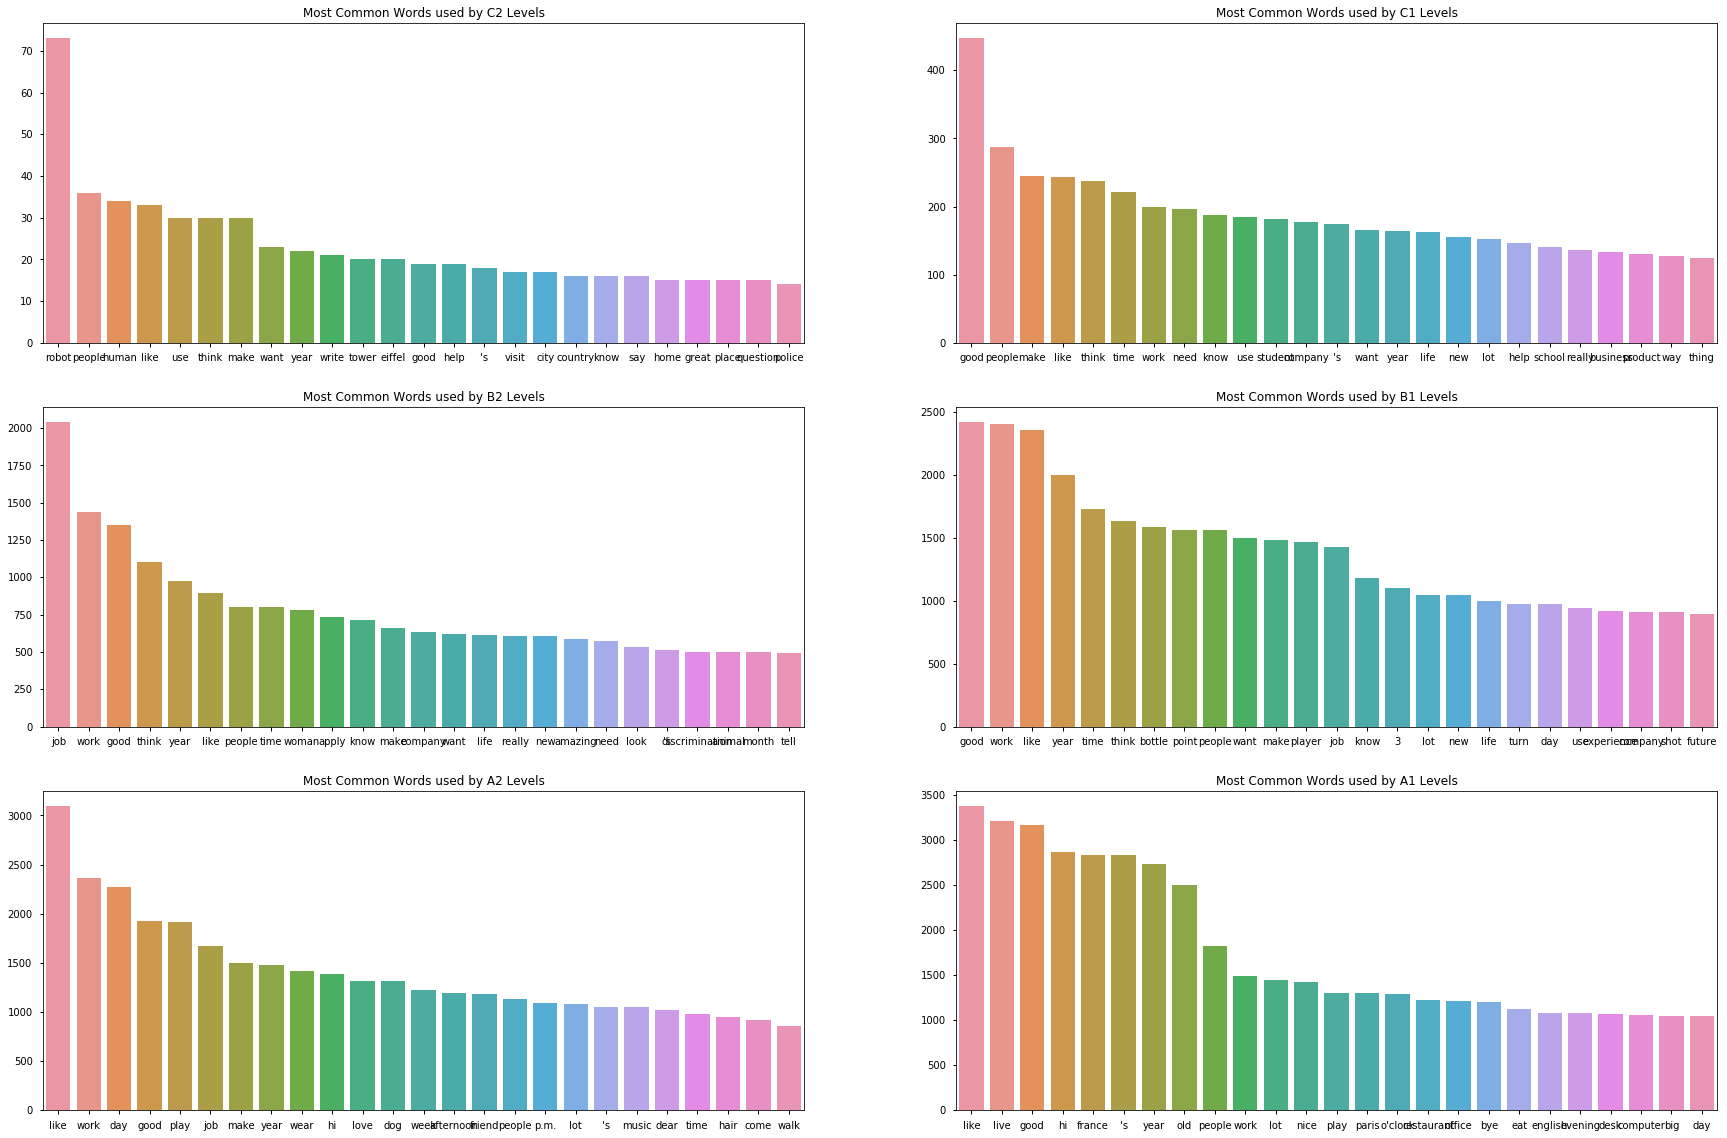

In [12]:
sns.set_context('notebook')
couples = [(c2_common_words, c2_common_count), 
           (c1_common_words, c1_common_count),
           (b2_common_words, b2_common_count),
           (b1_common_words, b1_common_count),
           (a2_common_words, a2_common_count),
           (a1_common_words, a1_common_count)]
fig=plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(321)
sns.barplot(x=c2_common_words, y=c2_common_count,ax=ax1)
plt.title('Most Common Words used by C2 Levels')
ax2 = fig.add_subplot(322)
sns.barplot(x=c1_common_words, y=c1_common_count, ax=ax2)
plt.title('Most Common Words used by C1 Levels')
ax3 = fig.add_subplot(323)
sns.barplot(x=b2_common_words, y=b2_common_count, ax=ax3)
plt.title('Most Common Words used by B2 Levels')
ax4 = fig.add_subplot(324)
sns.barplot(x=b1_common_words, y=b1_common_count, ax=ax4)
plt.title('Most Common Words used by B1 Levels')
ax5 = fig.add_subplot(325)
sns.barplot(x=a2_common_words, y=a2_common_count, ax=ax5)
plt.title('Most Common Words used by A2 Levels')
ax6 = fig.add_subplot(326)
sns.barplot(x=a1_common_words, y=a1_common_count, ax=ax6)
plt.title('Most Common Words used by A1 Levels')


plt.show()

In [13]:
#Spam..
print(data.loc[27291,:]['fulltext'])